In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

sns.set(style="darkgrid")

### Часть 0. Подготовка

Скачайте обучающую выборку из [этого](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview) соревнования и загрузите ее:

In [2]:
samp_sub_path = 'nyc-taxi-trip-duration/sample_submission.csv'
test_path = 'nyc-taxi-trip-duration/test.csv'
train_path = 'nyc-taxi-trip-duration/train.csv'

df = pd.read_csv(train_path, parse_dates=['pickup_datetime'])

In [3]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


#### Data fields
id - a unique identifier for each trip\
vendor_id - a code indicating the provider associated with the trip record\
pickup_datetime - date and time when the meter was engaged\
dropoff_datetime - date and time when the meter was disengaged\
passenger_count - the number of passengers in the vehicle (driver entered value)\
pickup_longitude - the longitude where the meter was engaged\
pickup_latitude - the latitude where the meter was engaged\
dropoff_longitude - the longitude where the meter was disengaged\
dropoff_latitude - the latitude where the meter was disengaged\
store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip\
**trip_duration** - duration of the trip in seconds

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 122.4+ MB


In [5]:
# этой колонки нет в тестовой выборке
df.drop(columns='dropoff_datetime', inplace=True)

Изучаем признак 'trip_duration'

C:\Users\churi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_duration', ylabel='Density'>

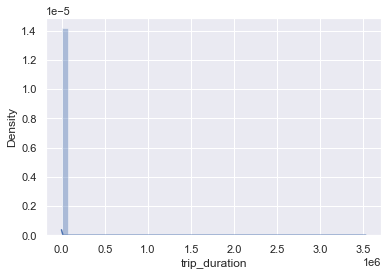

In [6]:
sns.distplot(df['trip_duration'])

Логарифмируем признак 'trip_duration'

C:\Users\churi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_trip_duration', ylabel='Density'>

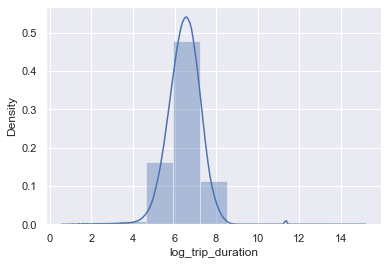

In [7]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])
sns.distplot(df['log_trip_duration'], bins=11)

In [8]:
df.drop(columns='trip_duration', inplace=True)

C:\Users\churi\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


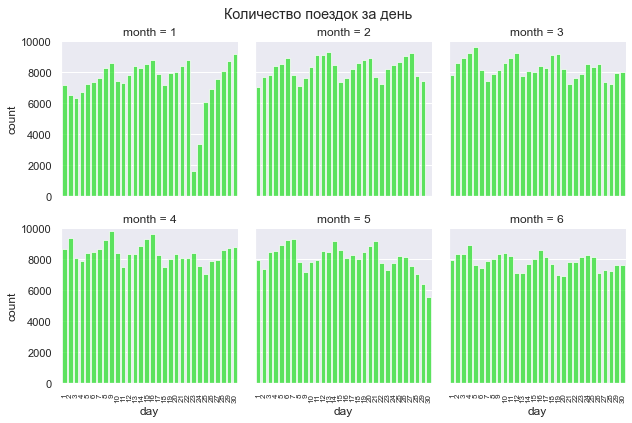

In [23]:

df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day

g = sns.FacetGrid(df, col='month', col_wrap=3, ylim=(0,10000))
g.map(sns.countplot, 'day', color='lime', alpha=0.7)
g.set_xticklabels(fontsize=8, rotation=90)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Количество поездок за день')

df.drop(columns=['month','day'], inplace=True)

На графиках видны несколько дней, в которых количество поездок было значительно ниже, чем обычно: 
* 23-24 января 2016 (в эти дни в Нью-Йорке была аномальная метель)
* 30 мая (день памяти в США)